In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# def gradient_amp_gray(img, point1):
#     x, y = point1
#     mask1 = [[-1,0,1],[-1,0,1],[-1,0,1]]
#     mask2 = [[-1,-1,-1],[0,0,0],[1,1,1]]

#     gx = np.sum(mask1 * img[y-1:y+2, x-1:x+2])
#     gy = np.sum(mask2 * img[y-1:y+2, x-1:x+2])

#     return np.sqrt(gx**2 + gy**2)



# def gradient_amp_color(img, point1):
#     x, y = point1
#     mask1 = [[-1,0,1],[-1,0,1],[-1,0,1]]
#     mask2 = [[-1,-1,-1],[0,0,0],[1,1,1]]

#     gx = np.sum(mask1 * img[y-1:y+2, x-1:x+2], axis=(0, 1))
#     gy = np.sum(mask2 * img[y-1:y+2, x-1:x+2], axis=(0, 1))

#     gradient_amp = np.sqrt(gx**2 + gy**2)
#     max_gradient_amp = np.max(gradient_amp)

#     return max_gradient_amp


In [6]:
import cv2
import numpy as np
import os
import scipy.ndimage
import matplotlib.pyplot as plt

In [5]:
img = cv2.imread("mats/pedestrians/pos/per00001.ppm").astype(np.int32)



folder_path = "mats/pedestrians/pos"

for i in range(1, 925):
  file_name = f"per{i:05d}.ppm"
  file_path = os.path.join(folder_path, file_name)
  
  img = cv2.imread(file_path)
  gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
  
  cv2.imshow(f"Grayscale Image {i}", gray_img)
  cv2.waitKey(0)

  # break if the user presses the 'q' key
  if cv2.waitKey(0) & 0xFF == ord('q'):
    break
cv2.destroyAllWindows()

max_B: [[ True False  True ... False False False]
 [ True  True  True ... False False  True]
 [ True  True False ...  True False False]
 ...
 [ True  True  True ...  True  True  True]
 [ True False False ...  True False  True]
 [False False False ...  True False False]]
 max_G: [[False False False ... False False False]
 [False False False ...  True  True False]
 [False False False ... False  True  True]
 ...
 [False False False ... False False False]
 [False False  True ... False  True False]
 [False False False ... False  True False]]
 max_R: [[False  True False ...  True  True  True]
 [False False False ... False False False]
 [False False  True ... False False False]
 ...
 [False False False ... False False False]
 [False  True False ... False False False]
 [ True  True  True ... False False  True]]
orientation: [[   2.72631099  180.         -174.55966797 ...    0.
   -59.93141718  -84.55966797]
 [   5.71059314  -92.38594403 -177.27368901 ...  180.
   154.65382406   90.        ]
 [

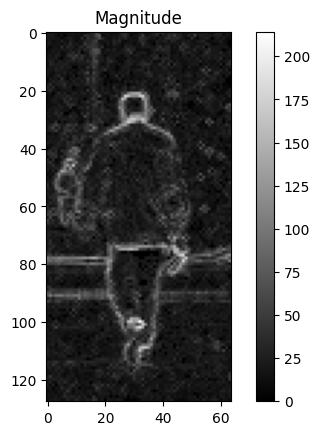

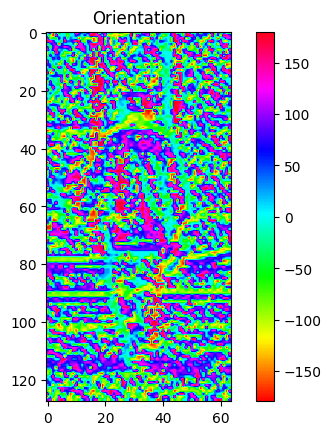

ornietation max/min: 180.0, -179.15747573925958


In [28]:
im = cv2.imread("mats/pedestrians/pos/per00001.ppm")

dx = scipy.ndimage.convolve1d(np.int32(im), np.array([ -1 , 0 , 1]) ,1)
dy = scipy.ndimage.convolve1d(np.int32(im), np.array([ -1 , 0 , 1]) ,0)

magnitude = np.sqrt(dx ** 2 + dy ** 2)
orientation = np.arctan2(dy, dx)

max_B = np.logical_and(magnitude[:, :, 1] < magnitude[: , : , 0], magnitude[:, :, 2] < magnitude[:, :, 0])
max_G = np.logical_and(magnitude[:, :, 0] < magnitude[: , : , 1], magnitude[:, :, 2] < magnitude[:, :, 1])
max_R = np.logical_and(magnitude[:, :, 0] < magnitude[: , : , 2], magnitude[:, :, 1] < magnitude[:, :, 2])

print(f'max_B: {max_B}\n max_G: {max_G}\n max_R: {max_R}')

# choose the maximum magnitude from the three channels

magnitude_max = np.max(magnitude, axis=2)

# choose the orientation of the maximum magnitude from the three channels

orientation = np.choose(np.argmax(magnitude, axis=2), [orientation[:, :, 0], orientation[:, :, 1], orientation[:, :, 2]]) * 180 / np.pi
print(f'orientation: {orientation}')
# plot the magnitude and orientation

plt.figure()
plt.imshow(magnitude_max, cmap='gray')
plt.title('Magnitude')
plt.colorbar()

plt.figure()

plt.imshow(orientation, cmap='hsv')
plt.title('Orientation')
plt.colorbar()

plt.show()

print(f'ornietation max/min: {np.max(orientation)}, {np.min(orientation)}')



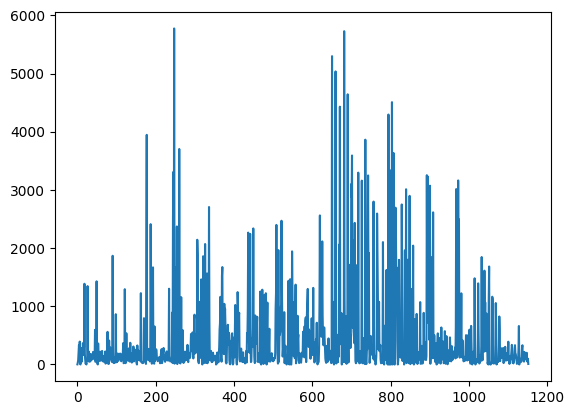

In [26]:
CELL_SIZE = 8
BLOCK_SIZE = 2
NBINS = 9

def hog(img):
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    gx = cv2.Sobel(img, cv2.CV_32F, 1, 0)
    gy = cv2.Sobel(img, cv2.CV_32F, 0, 1)
    mag, ang = cv2.cartToPolar(gx, gy)
    bins = np.int32(NBINS*ang/(2*np.pi))    # quantizing binvalues in (0...8)
    bin_cells = []
    mag_cells = []
    cellx = celly = CELL_SIZE
    for i in range(0,img.shape[0],celly):
        for j in range(0,img.shape[1],cellx):
            bin_cells.append(bins[i:i+celly, j:j+cellx])
            mag_cells.append(mag[i:i+celly, j:j+cellx])   
    hists = [np.bincount(b.ravel(), m.ravel(), NBINS) for b, m in zip(bin_cells, mag_cells)]
    hist = np.hstack(hists)     # hist is a 1D vector
    return hist

img = cv2.imread("mats/pedestrians/pos/per00001.ppm")
hist = hog(img)

plt.plot(hist)
plt.show()
